# **Quiz 5 Review - Short Version**

# Unsupervised Learning
---

## Intro to Unsupervised Learning
**Define supervised and unsupervised learning**
- Supervised learning has something to look at (know target) having a Y 
- Y values are part of our training data
- Unsupervised has no know target, no observed Y values as part of training data

**Identify strategy for unsupervised learning**
- Organize by features
- Use unsupervised first to get to supervised
- Not full list!

**Type of problems for unsupervised learning**
- Clustering
    - Creating profiles
- PCA
    - Focus on important features
- Network Analysis
    - Credit card fraud
    - Connections on social media
- Topic Modeling
    - Identify changes in discussions
    - NLP

## K-Means

**Understand basic unsupervised clustering problems**
- Group similar points or groups together
- Ride sharing 
- Find items with similar behavior (users, products, voters, etc)
- Market segmentation
- Understand complex systems
- Discover meaningful categories for your data
- Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
- Reduce the dimensions of your problem
- Pre-processing! Create labels for supervised learning

**Perform a K-Means Clustering Analysis**
- Steps for k-means
    1. Pick a value for k (the number of clusters to create)
    1. Initialize k 'centroids' (starting points) in your data
    1. Create your clusters. Assign each point to the nearest centroid.
    1. Make your clusters better. Move each centroid to the center of its cluster.
    1. Repeat steps 3-4 until your centroids converge.
- K: Number of cluster
- Means: mean points of the cluster
- centroid : center of cluster

**Evaluate clusters for fit**
- Pro: no assumptions / broad insights / black magic / no labels
- Cons: interpretability / difficult to tune /  know correctness without SME / no obvious choice / unconventional and unreliable

**Evaluation Metrics:**
- Silhouette Score
    - measure of how far apart clusters are
    - high Silhouette = clusters are well separated
- Inertia
    - sum of squared errors for each cluster
    - Compactness of a cluster (lower value)

## DBSCAN

**What is DBSCAN?**
- Density based clustering

**How does DBSCAN work?**
1. Choose epsilon: which defines a distance boundary from a point
1. Choose min num: the minimum number of points in the boundary
1. Picks arbitrary start point
1. Looks to see if min number of points is in boundary
    - If yes, adds to group, then moves to new random point in boundary
    - If no, moves to new random point
1. Stops when all points have been checked

**How does DBSCAN compare to K-Means and Hierarchical Clustering?**
- DBSCAN to k-Means
    - Selection of hyperparameter
    - K means needs a k selected, not necessary in DBSCAN
    - Density of the observations can be seen by DBSCAN
    - DBSCAN performs especially well with unevenly distributed, non-gausian clusters
    - Odd shapes
- DBSCAN to Hierarchical Clustering
    - HC: looks at all distances to all other points, computational heavy
    - DB: random starting pont
    
**Implementation**
- Code Example
`from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN`

## Principal Component Analysis

**Differentiate between feature elimination and feature extraction.**
-Feature Elimination
Dropping features / features importance (Lasso/ Ridge)
-Feature Extraction
Combining current features into new ones to minimize overall features but keeps all original data

**Describe the PCA algorithm.**
- Creates a series of weights (eigenvector) explaining the most variance in observations (PC1)
- Along new principal component axis, creates new series of weights explaining most variance (PC2) , and so on to - how many PC
- $PC_x = W_i,jX +....W_nX_n $
- Two assumption
    - Large variance defines importance
    - Linear relationship

**Identify use cases for PCA.**
- Too many columns versus rows
- High dimensionality
- Overdefined data
- Addressing Multicollinearity problem in fitting model computationally efficient

**Implement PCA in scikit-learn.**
1. ```Import PCA from sklearn.decomposition```
1. Scale features (if necessary)
1. Instantiate PCA
1. Fit transform to PCA
1. only include X because this is unsupervised, no y
1. Review explained variance

**Calculate and interpret proportion of explained variance.**
- Explained variance: How much variance per PC to total variance of all observations
- ```pca.explained_variance_ratio_```
- Cumulative variance: summing variance across all PC (PC1 + PC2 + ….) until threshold is meet (80%,95%,etc)

## Missing Data

### Types of missing data

- MCAR (Missing Completely at Random)
    - I'm a sleepy graduate student working in a lab, while pipetteing, I reach over to grab my pen but accidentally knock three petri dishes off the desk, from these petri dishes I lose all the data that I would have otherwise collected. 
        - The data of interest is not systematically different between respondents and nonrespondents.
    
- MAR (Missing at Random) 
    - I work in a lab that contains remote sensors. One sensor broke and thus did not gather information from 6:00 AM to 10:00 AM
        - Conditional on data we have observed, the data of interest is not systematically different between respondents and nonrespondents.
        - In this case, accounting for time can account for the missingness!
    
    
- NMAR (Not Missing at Random)
    - I administer a survey that contains a question about income. Those who have lower incomes are less likely to respond about the question about income
        - The data of interest are systematically different for respondents and nonrespondents.
        - Whether or not an observation is missing depends on the value of the unobserved data itself!

# Time Series / Correlated Data

### "Rolling" statistics through time, such as the rolling mean.
- Rolling implies the idea of taking a moving range or window of values that is used for the calculation. 
- When applying a rolling statistic to say a time series dataset we may specify a time window, say 14 days, an perform the calculation for all possible window frames of 14 days.
- Because we are not using the entirety of the dataset and only these windows, that stat is representative of the window in time **and** we make several calculations.
    - **Window** indicates the number of days to include in the average.
    - **Center** indicates whether the window should be centered on the date or use data prior to that date.
    - **Freq** indicates which level to roll the averages up to (as used in resample): D for day, M for month, A for year, etc.
- Lets think of an example.  "Weekly rain fall volume". This implies that we are measuring the rain fall of a 7 day period.  Additionally, this is a calculation that we're interested in measuring every day.  Because it is weekly, as days progress we can still only use the past 7 days for a calculation. 

**Rolling Total/AVG. Example Table**
    
| Date     | Rainfall | | Date     | Rainfall | | Date     | Rainfall | 
|:---------|----------|-|:---------|----------|-|:---------|----------|
|Sept. 7   |  0       | |Sept. 8   | 0        ||Sept. 9   | 8.5      |
|Sept. 6   | 1.5      ||Sept. 7   | 0        ||Sept. 8   | 0        |
|Sept. 5   | 4        ||Sept. 6   | 1.5      ||Sept. 7   | 0        |
|Sept. 4   | 0        ||Sept. 5   | 4        ||Sept. 6   | 1.5      |
|Sept. 3   | 12       ||Sept. 4   | 0        ||Sept. 5   | 4        |
|Sept. 2   | 0        ||Sept. 3   | 12       ||Sept. 4   | 0        |
|Sept. 1   | 2.5      ||Sept. 2   | 0        ||Sept. 3   | 12       |
|**Total** | **20**   ||**Total** | **17.5** ||**Total** | **26**   |
|**Avg. ** | **2.85** ||**Avg. ** | **2.5**  ||**Avg. ** | **3.71** |


### Autocorrelation and partial autocorrelation

**Autocorrelation**
- AutoCorrelation looks at how much an observation in a series is correlated with a later or earlier observation. 
- AutoCorrelation takes 1 parameter `K` or `Lag` which is the value you are trying to calculate the correlation with.  A lag of 7 units (if our units were days) would indicate the previous same day of the week.  Such as Saturday to the previous Saturday or Wednesday to the previous Wednesday.
    - A k of 365 (if our units were days) would indicate that date exactly one year ago.  Think Christmas or Halloween.

**Partial Autocorrelation**
- The Autocorrelation is a calculation for point $A_1$ and point $A_{1-k}$ and does not consider, in its calculation, the effects of all the observations that occur between $A_{1-k}$ and $A_1$.
- The Partial Autocorrelation will take into consideration these values during its calculation.
- This attempts to account for the fact that nearer observations tend to be more similar


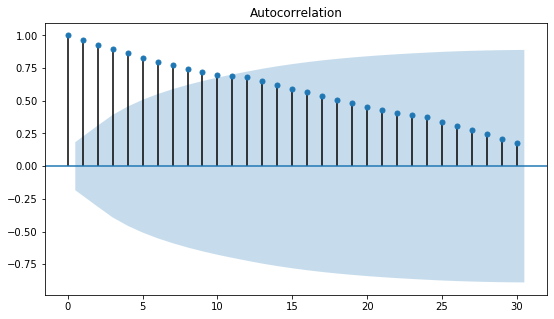

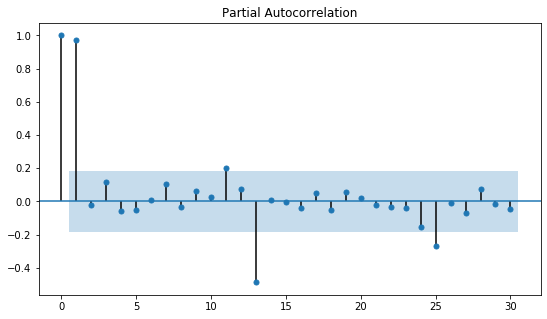

In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

bus = pd.read_csv("../data/bus.csv")
bus.set_index('date', inplace=True)

bus.index = pd.date_range('1/1/1973', # start date
                          periods = len(bus.index), # we want the number of periods to match the length of our index
                          freq = 'M')

fig, ax = plt.subplots(figsize = (9, 5))
plot_acf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

fig, ax = plt.subplots(figsize = (9, 5))
plot_pacf(bus['bus_ridership'], lags = 30, ax = ax)
plt.show();

### Describe when autoregressive models and moving average models are appropriate.

**AutoRegression (AR)**
- The models use previous observations as predictors.
- Autoregressive models are used for modeling Long Term trends **not** sudden fluctuations.
- AR models have a parameter "`p`" which indicates the number or previous observations to consider when making a prediction.
    - We can look at the Autocorrelation viz in order to identify a "`p`" value to use.

**Moving Average(MA)**
- Moving average (MA) models take previous error terms as inputs. They predict the next value based on deviations from previous predictions. 
- We want to use MA models when there are sudden fluctuations in our process.
- MA models have a parameter "`q`" which indicates the number or previous observations to consider when making a prediction.


### Define stationarity.
- A time series with a constant mean over time.
- Has an autocorrelation that only depends on lag $k$, not on time $t$.
- If you visualized the data it would have no clear upward or downward trend.  
    - It may even have a consistent trend of events.

### Conduct and interpret a Dickey-Fuller test for stationarity.
- We can utilize the Dickey-Fuller test to test for stationarity.
- This test is similar to a t-test in it outputs a p-value.
    - This Null Hypothesis is that the data is **Not Stationary**
        - Large P values support this hypothesis.
    - The Alternate Hypothesis is that the data **is Stationary**
        - Small P values support this hypothesis.
        
### Construct integrated autoregressive moving average (ARIMA) models.
- Combining/_integrating_ an AR and MA model results in an ARIMA Model.
- Useful when we want to model _longer term data with sudden fluctuations._
    - Not Stationary.


### Identify the optimal values of parameters $p$, $d$, and $q$.

- Given that the ARMA and ARIMA models are statsmodels, we can not use gridsearch, so we just have to for loop it after taking a good hard look at the ARC and PARC charts




# Bayesian Statistics

# Intro to Bayes

**Recognize and describe the axioms and properties of probability.**

- Axioms
    - Non-Negativity
        - For any event, $A$, the probability of the event must be greater than or equal to zero.
        - Can't have a negative probability (lamens) 
        - $0 <= P(A)$
    - Additivity
        - For mutual exclusive events, $e$, the probability of any of the events occuring is equivalnet to the sum of their probabilites
        - The union of all probability is equal to their sum
- Properties
    - Propability of no event
        - equals zero
    - joint probability
        - P(A|B) = multiply the probability that  BB  happens by the probability that  AA  occurs if  BB  does
        - basis for likelihood and prior in numerator of Bayes Theorem $P(B|A)P(B)$
    - Conditional probability
        - basis for posterior $P(A|B)$
        - target in Bayes Theorem
        - intersection of probability of two condtional events over all possibility of one of the events 
    - Law of total probability
        - bowl of cookies
        - to get overall combine probabilities from different intersections

**Describe Bayes' theorem.**
$$ P(A|B) = \frac{P(B|A)\;P(A)}{P(B)} $$



**Explain the diachronic interpretation of Bayes' theorem.**
- The Prior $P(A)$
    - The prior is our belief in the model given no additional information.
- The Likelihood $P(B|A)$
    - The likelihood is the probability of the data we observed occurring given the model
    - Will influence our Prior
- The Posterior $P(A|B)$
    - Conditional probability
    - What we are lloking for
- The Marginal Probability $P(B)$
    - data is the probability that our data are observed regardless of what model
    - total probability where our event occurred


## Bayes Inference

**Describe the relationships among parameter, statistic, sample, and
population.**
 - Population -> Sample -> Statistic -> Parameters
 - _population_: All observation
 - _sample_: subsection of the population
 - _statistics_: calculated from the sample
 - _parameters_: inferes to the entire population

**Understand how Bayes’ Theorem connects to Bayesian inference.**
- Bayes Theorem allows us to apply to distribution and connect prior knowledge
- continued iteritive process for inference


**Describe the posterior distribution.**
- Combination of our data and our prior 
- describes the combination of your priors and evidence(likliehood)
- likelihood relates y to your $f(\theta)$
- $f(\theta | y)$
-

**Identify methods for choosing a prior and a likelihood.**

- conjugacy between your prior and likelihood
- likelihood dist should only influence the posterior , develop prior first and then add likelihood

**Understand how simulations play such a large role in Bayesian inference.**

- conjugacy is limiting, using simulation allows use to use more complicated distribution combinations
- computer powers allow more complex problems

## MCMC

**Identify the Markov property.**
- __Markov chains__: how a random variable changes from one state to another
- __Markov Property__: if i know what is happening at time t, i know just as much about what will happen at t+1, without having to back to t=1.

**Describe Monte Carlo simulations.**
- powerful way to model complex systems by generating random numbers

**Describe how MCMC works.**
- MCMC is a method that can find the posterior distribution of our parameter of interest. Specifically, this type of algorithm generates Monte Carlo simulations in a way that relies on the Markov property, then accepts these simulations at a certain rate to get the posterior distribution.

- Monte Carlo Methods
    - large random sampling process to generate numerical results 
- Markov Chains
    - when we sample random numbers, we're going to rely on the previous random number to help randomly generate the next one
- Acceptance Rejection Sampling
    - specific type of Monte Carlo
    - decide to keep or discard it 
    - Keeps in going in the right direction

**Identify situations where MCMC is beneficial.**
- helpful in cases when we don't have conjugate priors/posteriors


## Maximum Likelihood

**Understand the Beta Distribution**
- distribution of probabilites, binary choice and their probabilities

**Describe the concept of "conjugacy" and "conjugate priors" in Bayesian statistics**
- conjugate priors are the linked distribution that allow simple calculations

**Set up an example of the Beta-Binomial model using a midterm election example**
- in notebook

**Calculate the Maximum Likelihood Estimate**
- highest point in the posterior distribution

**Use the Beta-Binomial model to build our example in a Bayesian framework**
- combining a beta prior with a binomial likelihood can generate a beta posterior within Bayesian terms